# A tour through Visualization Zoo - Hierarchies

**Author - Cibaca Pramod Khandelwal, Nik Bear Brown**


This notebook contains fifth section of A tour of visualization chapter related to Hierarchies

While some data is just a flat collection of numbers, most can be organized into natural hierarchies. 

Consider: spatial units such as counties, states and countries; corporate and government command structures; software packages and phylogenetic trees. Even for data without an obvious hierarchy, statistical methods (eg k-means clustering) can be used to organize the data empirically. 

To take advantage of the hierarchical structure, there are special imaging techniques that allow rapid multidimensional inference: micro-observations of individual elements and macro-observations of large groups.

![Image1](https://drive.google.com/uc?id=1nc-N4OdXJTp8oYPrSK0IwY7oj1t2VPK2)



![Image1](https://drive.google.com/uc?id=1FJfbdIGrscnhdvmFtAUPOApitzE54p1U)

## 1. Node-link Diagrams

* The word tree is used interchangeably with hierarchy, as the fractal sections of an oak tree can reflect the nesting of data. 
* If we take a two-dimensional plan of a tree, we have a popular alternative for visualizing hierarchies: the node-link diagram. 
* Many different tree placement algorithms have been designed; The **Reingold-Tilford algorithm** used in the package hierarchy of software classes shown in Figure 
* A produces a clean result with minimal wasted space.

![Image1](https://drive.google.com/uc?id=1BzY2AA0_FOnmmM-_-te3R8Hxdna1EswV)

Sure, here's an example code for a simple node link diagram using the networkx and matplotlib libraries:

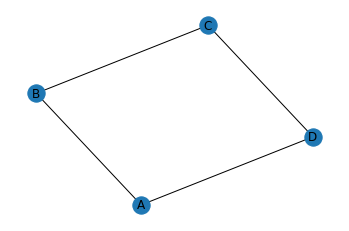

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")

# Add edges
G.add_edge("A", "B")
G.add_edge("B", "C")
G.add_edge("C", "D")
G.add_edge("D", "A")

# Create a layout for the nodes
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)

# Label nodes
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

# Show the plot
plt.axis("off")
plt.show()


This code creates a simple graph with four nodes and four edges in a cyclic pattern, and uses the spring_layout function from networkx to generate a layout for the nodes. 

Then, it uses nx.draw_networkx_nodes, nx.draw_networkx_edges, and nx.draw_networkx_labels to draw the nodes, edges, and labels respectively. 

Finally, it uses plt.axis("off") to turn off the axes and plt.show() to display the plot.

In [2]:
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    
    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

/usr/local/lib/python3.8/dist-packages/networkx/drawing/nx_pylab.py:304: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


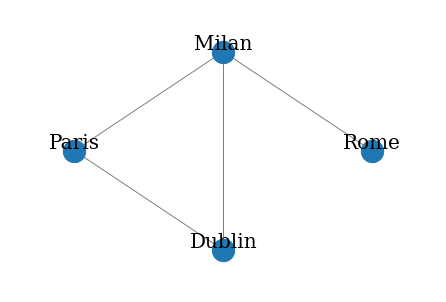

In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Paris'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

## Usage of Node Link Digrams
* **To represent complex relationships and structures in data** 

* **Visualizing the structure of neural networks**

  Neural networks consist of interconnected layers of nodes (also called neurons) that process input data and produce output predictions. The connections between the nodes are represented by weights, which are learned from training data to optimize the performance of the model.

  Node link graphs can be used to visualize the structure of a neural network, including the number of layers and nodes, the connections between the nodes, and the strength of the weights. This can help machine learning practitioners to understand and interpret the behavior of the model, identify potential issues or areas for improvement, and communicate the structure of the model to stakeholders.

* **Visualizing the structure of decision trees, clustering models, and other types of models that involve relationships between data points or features**

An alternative visualization scheme is the dendrogram (or cluster) algorithm, which places leaf nodes of the tree at the same level. Thus, in the diagram in figure 4B, the classes (orange leaf nodes) are on the diameter of the circle, with the packages (blue internal nodes) inside. Using polar rather than Cartesian coordinates has a pleasing aesthetic, while using space more efficiently.

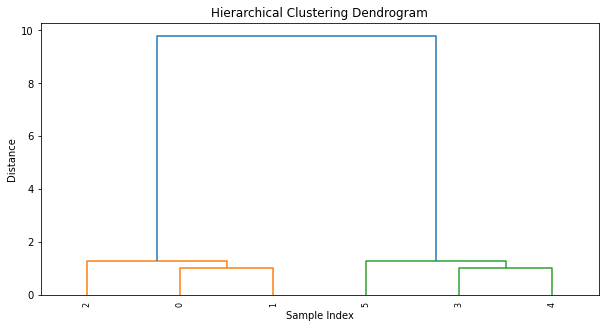

In [4]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate sample data
X = np.array([[0, 0], [0, 1], [1, 0], [4, 4], [4, 5], [5, 4]])

# Perform hierarchical clustering using Ward's method
Z = linkage(X, 'ward')

# Create and display the dendrogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.show()


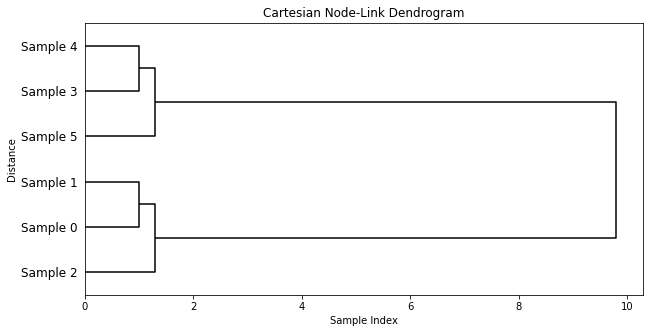

In [5]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate sample data
X = np.array([[0, 0], [0, 1], [1, 0], [4, 4], [4, 5], [5, 4]])

# Perform hierarchical clustering using Ward's method
Z = linkage(X, 'ward')

# Create and display the Cartesian node-link dendrogram
fig, ax = plt.subplots(figsize=(10, 5))
ax.set(title="Cartesian Node-Link Dendrogram", xlabel="Sample Index", ylabel="Distance")
dendrogram(Z, orientation="right", labels=[f"Sample {i}" for i in range(X.shape[0])],
           color_threshold=np.inf, link_color_func=lambda k: 'black', ax=ax)
plt.show()


# 2. Adjacency Diagrams


A Adjacency Diagrams is a space-filling variant of a node-link graph; instead of drawing a relationship between the upper and lower levels of the hierarchy, nodes are drawn as solid regions (or arcs or columns) and their position relative to adjacent nodes indicates their position in the hierarchy. 

![Image1](https://drive.google.com/uc?id=1y9at9_kIbQjr3gsjx74WkfgudFn-RUUQ)

In [6]:
! pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(0.0, 100.0, 0.0, 100.0)

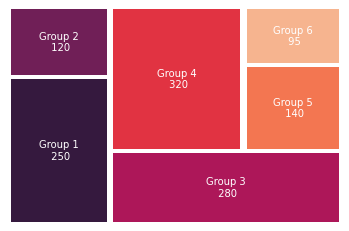

In [7]:
import matplotlib.pyplot as plt
import squarify
import seaborn as sb

# Sample data
values = [250, 120, 280, 320, 140, 95]
labels = ['Group 1\n 250', 'Group 2\n 120', 'Group 3\n 280',
          'Group 4\n 320', 'Group 5\n 140', 'Group 6\n 95']

# Treemap
squarify.plot(sizes = values, label = labels,
              pad = 0.2,
              text_kwargs = {'fontsize': 10, 'color': 'white'},
              color = sb.color_palette("rocket", len(values)))

# Remove the axis:
plt.axis("off")

# plt.show()

In [8]:
import plotly.express as px

data = dict(
    categories = ['A', 'B', 'C',
                  'A1', 'A2', 'A3',
                  'B1', 'B2', 
                  'C1', 'C2', 'C3'],
    parent = [ '', '', '', 'A', 'A', 'A', 'B', 'B', 'C', 'C', 'C'],
    value = [35, 25, 40, 10, 15, 10, 12, 13, 10, 20, 10])

fig = px.sunburst(data,
                  names = 'categories',
                  parents = 'parent',
                  values = 'value')
    
fig.show()

# 3. Enclosure Diagrams

An enclosed diagram is a type of diagram that uses enclosed shapes to represent different groups or classes within a dataset. The shapes are often color-coded or labeled to indicate the class they represent, and the diagram can help identify patterns or clusters of data points that belong to the same class.

In machine learning, enclosed diagrams can be useful for visualizing the output of clustering algorithms, such as k-means or hierarchical clustering. By grouping similar data points into clusters, these algorithms can help identify patterns and structure in large datasets. Enclosed diagrams can then be used to visualize the results of the clustering, making it easier to interpret the results and identify any outliers or anomalies in the data.

Overall, enclosed diagrams can be a valuable tool for visualizing complex datasets and identifying patterns or clusters of data points, especially in unsupervised learning tasks such as clustering.



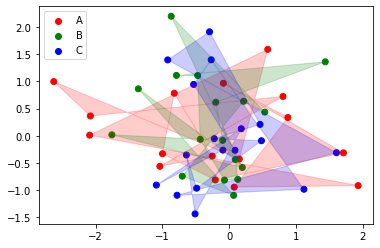

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data
x = np.random.normal(0, 1, 50)
y = np.random.normal(0, 1, 50)
labels = np.random.choice(['A', 'B', 'C'], 50)

# Create a dictionary to map labels to colors
colors = {'A': 'red', 'B': 'green', 'C': 'blue'}

# Create a scatter plot with colored points
plt.scatter(x, y, c=[colors[label] for label in labels])

# Draw enclosing shapes for each group
for label in set(labels):
    xc = x[labels == label]
    yc = y[labels == label]
    hull = plt.Polygon(np.column_stack((xc, yc)), color=colors[label], alpha=0.2)
    plt.gca().add_patch(hull)

# Add legend
handles = [plt.scatter([],[], color=colors[label], label=label) for label in set(labels)]
plt.legend(handles=handles)

plt.show()


In [10]:
! pip install gapminder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
! pip install circlify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from pprint import pprint as pp
import circlify as circ
circles = circ.circlify([19, 17, 13, 11, 7, 5, 3, 2, 1], show_enclosure=True)
pp(circles)


[Circle(x=0.0, y=0.0, r=1.0, level=0, ex=None),
 Circle(x=-0.633232604611031, y=-0.47732413442115296, r=0.09460444572843042, level=1, ex={'datum': 1}),
 Circle(x=-0.7720311587589236, y=0.19946176418549022, r=0.13379089020993573, level=1, ex={'datum': 2}),
 Circle(x=-0.43168871955473165, y=-0.6391381648617572, r=0.16385970662353394, level=1, ex={'datum': 3}),
 Circle(x=0.595447603036083, y=0.5168251295666467, r=0.21154197162246005, level=1, ex={'datum': 5}),
 Circle(x=-0.5480911056188739, y=0.5115139053491098, r=0.2502998363185337, level=1, ex={'datum': 7}),
 Circle(x=0.043747233552068686, y=-0.6848366902134195, r=0.31376744998074435, level=1, ex={'datum': 11}),
 Circle(x=0.04298737651230445, y=0.5310431146935967, r=0.34110117996070605, level=1, ex={'datum': 13}),
 Circle(x=-0.3375943908160698, y=-0.09326467617622711, r=0.39006412239133215, level=1, ex={'datum': 17}),
 Circle(x=0.46484095011516874, y=-0.09326467617622711, r=0.4123712185399064, level=1, ex={'datum': 19})]


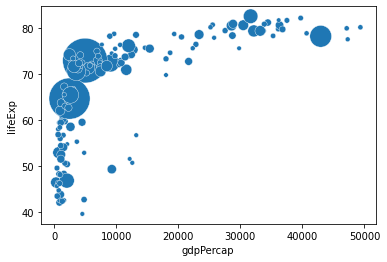

In [13]:



# libraries
import matplotlib.pyplot as plt
import seaborn as sns
from gapminder import gapminder # data set

# data
data = gapminder.loc[gapminder.year == 2007]

# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x="gdpPercap", y="lifeExp", size="pop", legend=False, sizes=(20, 2000))

# show the graph
plt.show()

# References


1. A Tour through the Visualization Zoo By Jeffrey Heer, Michael Bostock, and Vadim Ogievetsky, Stanford University https://queue.acm.org/detail.cfm?id=1805128 
2. Chat GPT website [https://chat.openai.com/chat]
3. Hierarchy Visualization documentation
https://architect-api.readthedocs.io/en/latest/text/document-vis-hierarchy.html 

# License  

All code in this notebook is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license.  https://creativecommons.org/licenses/by/3.0/us/

These licenses let people distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2023 AI Skunks  https://github.com/aiskunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.